In [1]:
import pandas as pd
import glob
from pathlib import Path
import pandas_profiling
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_csv('processed_dataset.csv')

In [4]:
df['measure_date'] = pd.to_datetime(pd.to_datetime(df['measure_date']).dt.date)
df['departure_date'] = pd.to_datetime(pd.to_datetime(df['departure_date']).dt.date)
df['arrival_date'] = pd.to_datetime(pd.to_datetime(df['arrival_date']).dt.date)

In [5]:
df.dtypes

departure_city                     object
arrival_city                       object
flight_duration                     int64
carrier_name                       object
agent_name                         object
flight_number                       int64
price                             float64
measure_date               datetime64[ns]
departure_date             datetime64[ns]
departure_hour                      int64
departure_minute                    int64
arrival_date               datetime64[ns]
arrival_hour                        int64
arrival_minute                      int64
days_left_to_departure              int64
previous_price_for_trip           float64
dtype: object

In [6]:
df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(200)

departure_date  arrival_date  departure_city  arrival_city  flight_number  carrier_name         
2020-03-05      2020-03-05    warsaw          barcelona     1475           wizz air                 11
2020-03-08      2020-03-08    venice          amsterdam     3331           easyjet                  11
                              warsaw          barcelona     802            ukraine international    11
                                                            1475           wizz air                 11
2020-03-11      2020-03-11    venice          amsterdam     3331           easyjet                  11
2020-03-14      2020-03-14    berlin          amsterdam     4561           easyjet                  11
                                                            4563           easyjet                  11
                              venice          amsterdam     3331           easyjet                  11
2020-03-02      2020-03-02    berlin          brussels      5011           easy

In [47]:
group_idx = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).size().nlargest(100).index[0]

In [48]:
group_values = df.sort_values('measure_date').groupby(['departure_date','arrival_date','departure_city','arrival_city','flight_number','carrier_name']).get_group(group_idx)

In [49]:
group_values

,departure_city,arrival_city,flight_duration,carrier_name,agent_name,flight_number,price,measure_date,departure_date,departure_hour,departure_minute,arrival_date,arrival_hour,arrival_minute,days_left_to_departure,previous_price_for_trip
166938,warsaw,barcelona,175,wizz air,wizz air,1475,1680.15,2020-02-03,2020-03-05,14,20,2020-03-05,17,15,31,0.00
25245,warsaw,barcelona,175,wizz air,wizz air,1475,1339.07,2020-02-06,2020-03-05,14,20,2020-03-05,17,15,28,1680.15
41567,warsaw,barcelona,175,wizz air,wizz air,1475,809.38,2020-02-09,2020-03-05,14,20,2020-03-05,17,15,25,1339.07
90223,warsaw,barcelona,175,wizz air,wizz air,1475,1060.58,2020-02-12,2020-03-05,14,20,2020-03-05,17,15,22,809.38
98509,warsaw,barcelona,175,wizz air,wizz air,1475,1620.90,2020-02-15,2020-03-05,14,20,2020-03-05,17,15,19,1060.58
223306,warsaw,barcelona,175,wizz air,wizz air,1475,1736.36,2020-02-18,2020-03-05,14,20,2020-03-05,17,15,16,1620.90
191326,warsaw,barcelona,175,wizz air,wizz air,1475,1480.86,2020-02-21,2020-03-05,14,20,2020-03-05,17,15,13,1736.36
86389,warsaw,barcelona,175,wizz air,wizz air,1475,1484.10,2020-02-24,2020-03-05,14,20,2020-03-05,17,15,10,1480.86
217162,warsaw,barcelona,175,wizz air,wizz air,1475,1295.11,2020-02-27,2020-03-05,14,20,2020-03-05,17,15,7,1484.10
8517,warsaw,barcelona,175,wizz air,wizz air,1475,1501.86,2020-03-01,2020-03-05,14,20,2020-03-05,17,15,4,1295.11


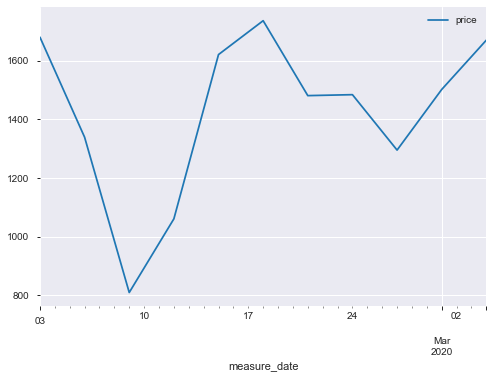

In [50]:
group_values.plot(x='measure_date', y='price')